reference: [comparison of F-test and mutual information](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py)

[f-statistic in linear regression](https://youtu.be/7ArmBVF2dCs?t=1102)

if f-statistic p_values is NOT below 0.05, then it is statistically not significant. Therefore, drop that feature.

multicollinearity will not decrease the metrics performance. However, it will make the computation more costly.

[pearson, spearman, kendall](https://www.phdata.io/blog/data-science-stats-review/)

pearson coeff for variables with linear relationship (if you plot them and see clear curves or a parabola, then it is nonlinear.)

spearman coeff for variables that move in the same direction but not at a constant rate. (i.e. y=x^2) -> agak melengkung tapi ga belok arah. google 'Monotonic relationship'.

![pearson vs spearman](./images/Comparison-of-the-Spearmans-rank-correlation-coefficient-with-respect-to-the-parametric.png)

kendall coeff sama seperti spearman.

[linear regression is also infinite dimension](https://youtu.be/7ArmBVF2dCs?t=808)

[RBF / radial basis function makes 1 feature x-axis into infinite dimension](https://youtu.be/Qc5IyLW_hns?t=506). In other words, you can separate data with just a line by doing this `(Dosage, Dosage^2)` or plane by doing this `(Dosage, Dosage^2, Dosage^3)`.

'pearson'

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.023928,0.023928,-0.025544,-0.025544,0.015607
X2,0.023928,1.000000,1.000000,0.031492,0.031492,-0.031378
X3,0.023928,1.000000,1.000000,0.031492,0.031492,-0.031378
X4,-0.025544,0.031492,0.031492,1.000000,1.000000,0.018939
X5,-0.025544,0.031492,0.031492,1.000000,1.000000,0.018939
X6,0.015607,-0.031378,-0.031378,0.018939,0.018939,1.000000


'spearman'

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.023254,0.023254,-0.026139,-0.026139,0.013752
X2,0.023254,1.000000,1.000000,0.031073,0.031073,-0.031122
X3,0.023254,1.000000,1.000000,0.031073,0.031073,-0.031122
X4,-0.026139,0.031073,0.031073,1.000000,1.000000,0.017800
X5,-0.026139,0.031073,0.031073,1.000000,1.000000,0.017800
X6,0.013752,-0.031122,-0.031122,0.017800,0.017800,1.000000


'kendall'

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.015928,0.015928,-0.017465,-0.017465,0.009842
X2,0.015928,1.000000,1.000000,0.021317,0.021317,-0.020252
X3,0.015928,1.000000,1.000000,0.021317,0.021317,-0.020252
X4,-0.017465,0.021317,0.021317,1.000000,1.000000,0.012589
X5,-0.017465,0.021317,0.021317,1.000000,1.000000,0.012589
X6,0.009842,-0.020252,-0.020252,0.012589,0.012589,1.000000


'pearson'

,X1,X2,X3,X4,X5,X6,y
y,0.393769,-0.295857,-0.295857,-0.031257,-0.031257,0.046240,1.000000


'spearman'

,X1,X2,X3,X4,X5,X6,y
y,0.388383,-0.299768,-0.299768,-0.032197,-0.032197,0.047672,1.000000


'kendall'

,X1,X2,X3,X4,X5,X6,y
y,0.271820,-0.200076,-0.200076,-0.022090,-0.022090,0.032404,1.000000


========= SelectKBest =========
f-statistic [183.14  95.74  95.74   0.98   0.98   2.14]
p_values [0.   0.   0.   0.32 0.32 0.14] [ True  True  True False False False]
coef [ 1.06e+00  8.07e+13 -8.07e+13 -1.31e-02  9.15e-02]
MAE 0.5871808395118054
========= f_regression =========
f-statistic [183.14  95.74  95.74   0.98   0.98   2.14]
f-statistic ratio [1.   0.52 0.52 0.01 0.01 0.01]
p_value [0.   0.   0.   0.32 0.32 0.14] [ True  True  True False False False]
========= mutual_info_regression =========
mi [0.27 0.84 0.84 0.02 0.02 0.  ]
mi ratio [0.32 1.   1.   0.02 0.02 0.  ]


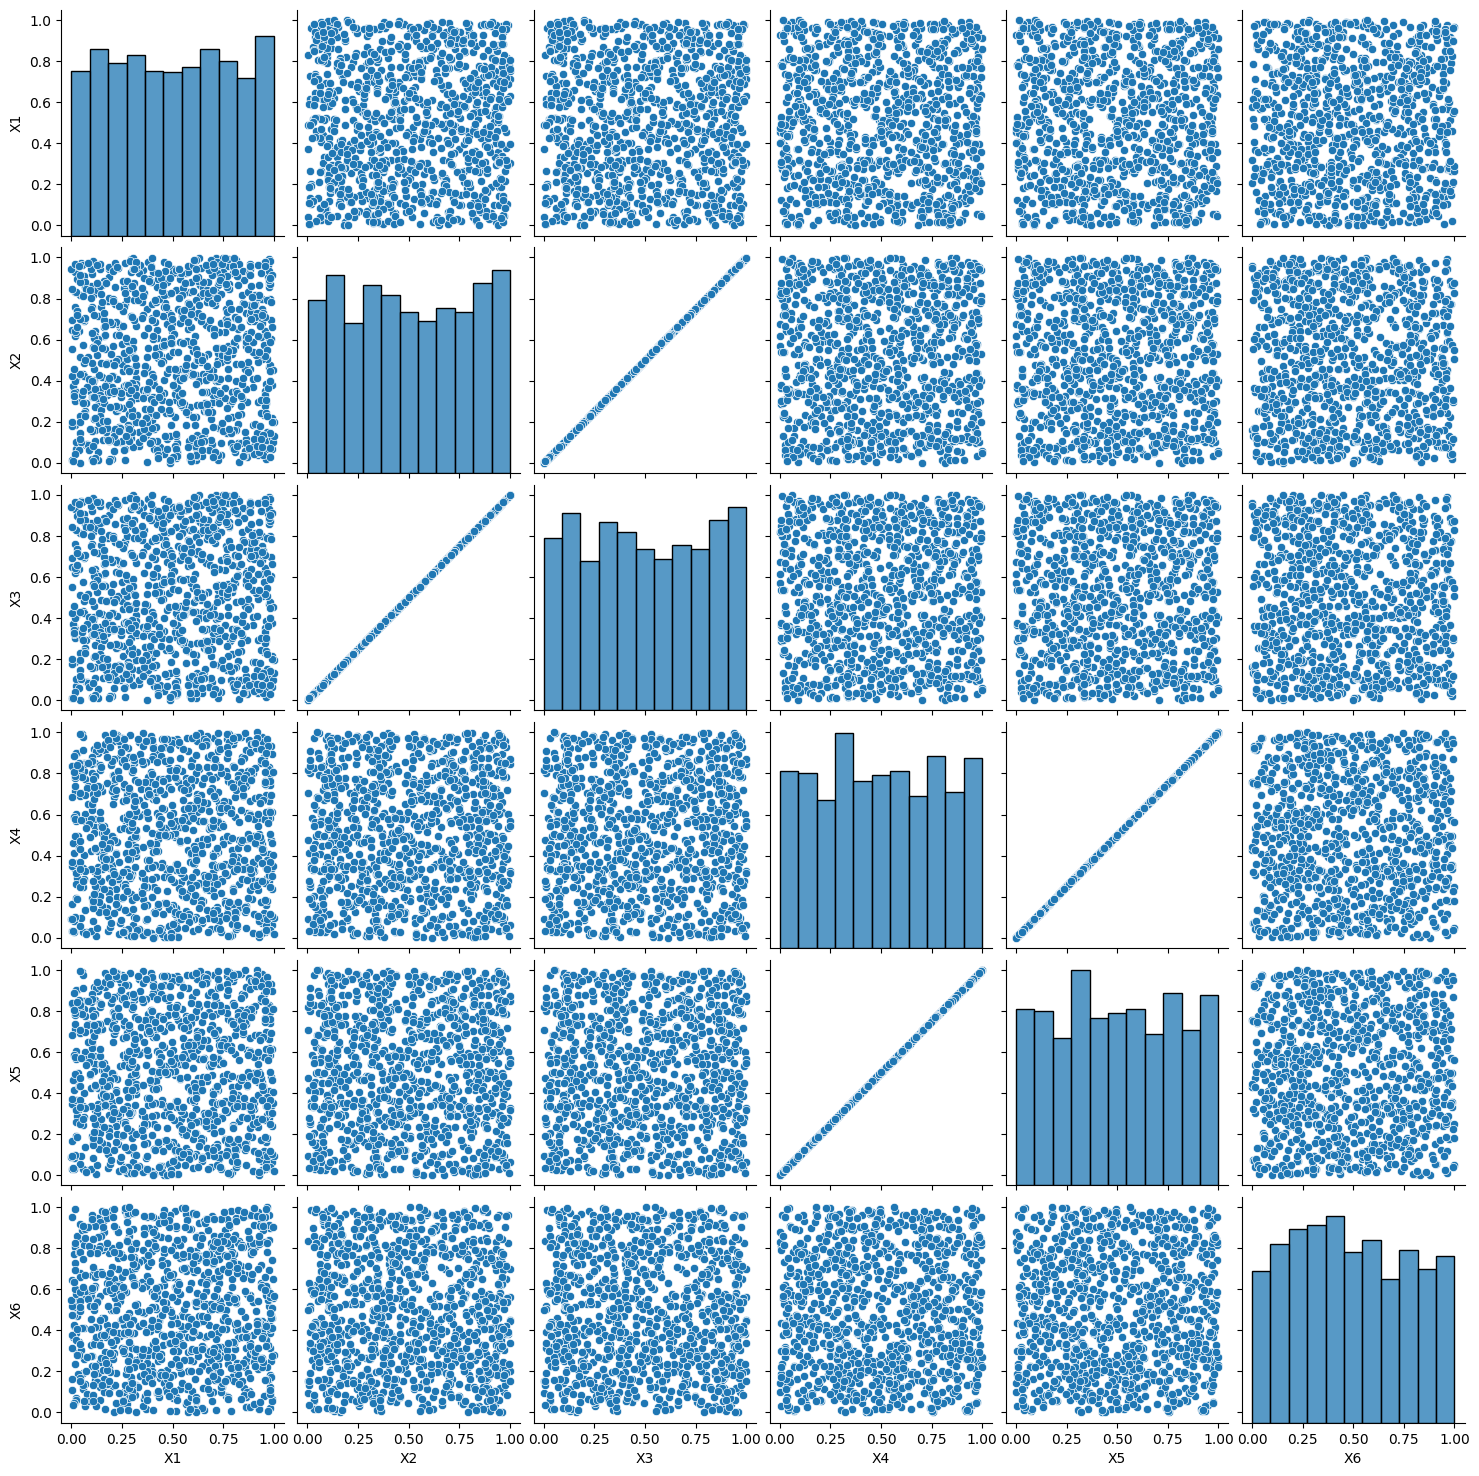

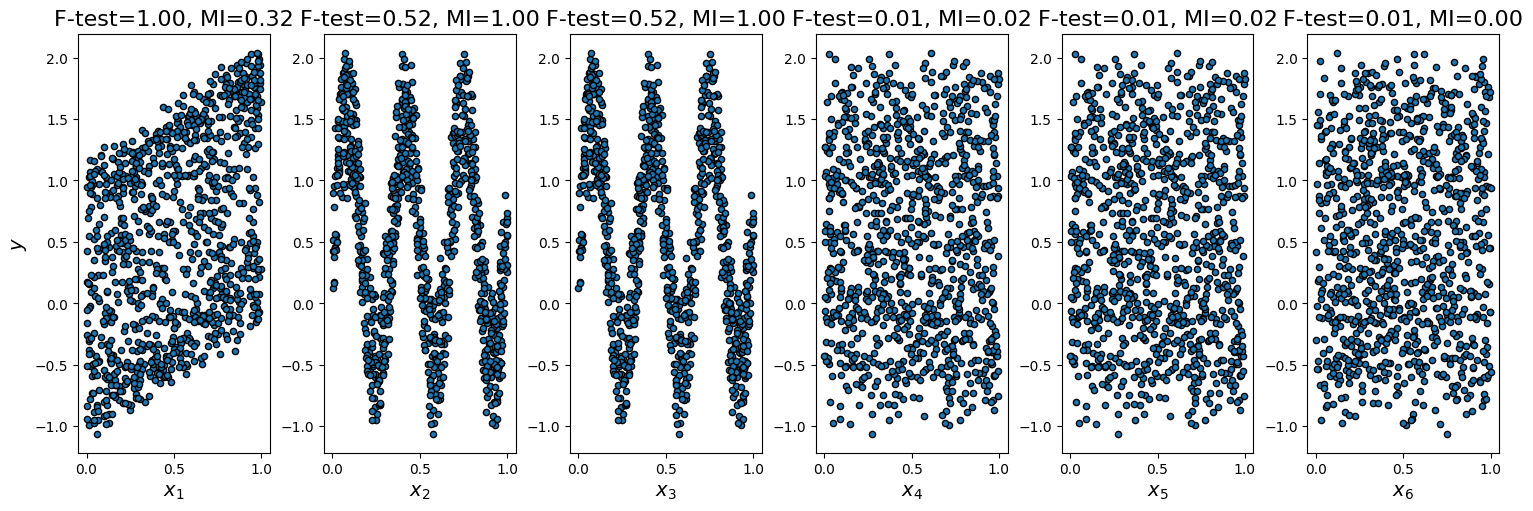

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import seaborn as sns
np.set_printoptions(precision=2, suppress=True)

np.random.seed(0)
X1X2X3 = np.random.rand(1000,2)
X3X4X5 = np.random.rand(1000,2)
X = np.concatenate([
    X1X2X3[:,[0]], 
    X1X2X3[:,[1]], 
    X1X2X3[:,[1]], 
    X3X4X5[:,[0]], 
    X3X4X5[:,[0]], 
    X3X4X5[:,[1]]
], axis=1)
X_df = pd.DataFrame(data=X, columns=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
y = pd.Series(
    data=X_df.iloc[:, 0] + np.sin(6 * np.pi * X_df.iloc[:, 1]) + 0.1 * np.random.randn(1000),
    name='y'
)

sns.pairplot(data=X_df)
display("pearson", X_df.corr(method='pearson').style.background_gradient(cmap='coolwarm'))
display("spearman", X_df.corr(method='spearman').style.background_gradient(cmap='coolwarm'))
display("kendall", X_df.corr(method='kendall').style.background_gradient(cmap='coolwarm'))

Xy = pd.concat([X_df,y], axis=1)
display("pearson", Xy.corr(method='pearson')[['y']].T.style.background_gradient(cmap='coolwarm'))
display("spearman", Xy.corr(method='spearman')[['y']].T.style.background_gradient(cmap='coolwarm'))
display("kendall", Xy.corr(method='kendall')[['y']].T.style.background_gradient(cmap='coolwarm'))

print("========= SelectKBest =========")
sel = SelectKBest(score_func=f_regression, k=5).fit(X=X, y=y)
print("f-statistic", sel.scores_)
print("p_values", sel.pvalues_, sel.pvalues_ < 0.05)
X_new = sel.transform(X=X)
print("===============================")

reg = LinearRegression().fit(X=X_new,y=y)
y_pred = reg.predict(X=X_new)
# X1, X2, and then ??? due to random chances
# there is a small probability that X3, y reduce SS(fit) and result in a better R^2
# it tricks the algoritm.
print("coef", reg.coef_) 

print("MAE", mean_absolute_error(y_true=y, y_pred=y_pred))

print("========= f_regression =========")
f_test, p_values = f_regression(X_df, y)
print("f-statistic", f_test)
f_test /= np.max(f_test)
print("f-statistic ratio", f_test)
print("p_value", p_values, p_values < 0.05) # X1,X2 statistically significant
print("================================")

print("========= mutual_info_regression =========")
mi = mutual_info_regression(X_df, y)
print("mi", mi)
mi /= np.max(mi)
print("mi ratio", mi)
print("==========================================")

plt.figure(figsize=(15, 5), layout="constrained")
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.scatter(X_df.iloc[:, i], y, edgecolor="black", s=20)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]), fontsize=16)
plt.show()